# EXPLORATORY DATA ANALYSIS 
---

In [1]:
import pandas as pd
import utils as eda
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATASET
total_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Logistic-Regression-Project-Tutorial-Fouine\data\interim\clean_total_data.csv')
#TARGET VARIABLE
target = 'y'

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

## Step 1: Multivariable analysis
---

_NOTE: Since there are categorical variables, a factorization process will be made._

The categoric variables are:
job, marital, education, default, housing, loan. 

Two datasets will be made: the first with the unkowns and the second without them.

In [2]:
# COPY FOR NAN DATASET
nan_total_data = total_data.copy()

In [3]:
categoric = ['job','marital','education','default','housing','loan','y']

# LOOP FOR FACTORIZATION
for x in total_data[categoric]:
    total_data[x] = pd.factorize(total_data[x])[0] 

# SEE RESULTS
total_data.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,0,0,0,0,0,0,93.994,-36.4,4.857,0
1,57,1,0,1,1,0,0,93.994,-36.4,4.857,0
2,37,1,0,1,0,1,0,93.994,-36.4,4.857,0
3,40,2,0,2,0,0,0,93.994,-36.4,4.857,0
4,56,1,0,1,0,0,1,93.994,-36.4,4.857,0


Dataset with 'unknown' values replaced

In [4]:
nan_total_data.replace('unknown',np.nan,inplace=True)
nan_count_per_column = nan_total_data.isna().sum()
# Print or display the result
print(nan_count_per_column)
# LOOP FOR FACTORIZATION
#for x in nan_total_data[categoric]:
#    nan_total_data[x] = pd.factorize(nan_total_data[x])[0]
# Define the replaced columns as outliers (for later)
outliers = ['job','marital','education','default','housing','loan']

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
y                    0
dtype: int64


### 1.2. Numerical - Numerical analysis between predictors and target:

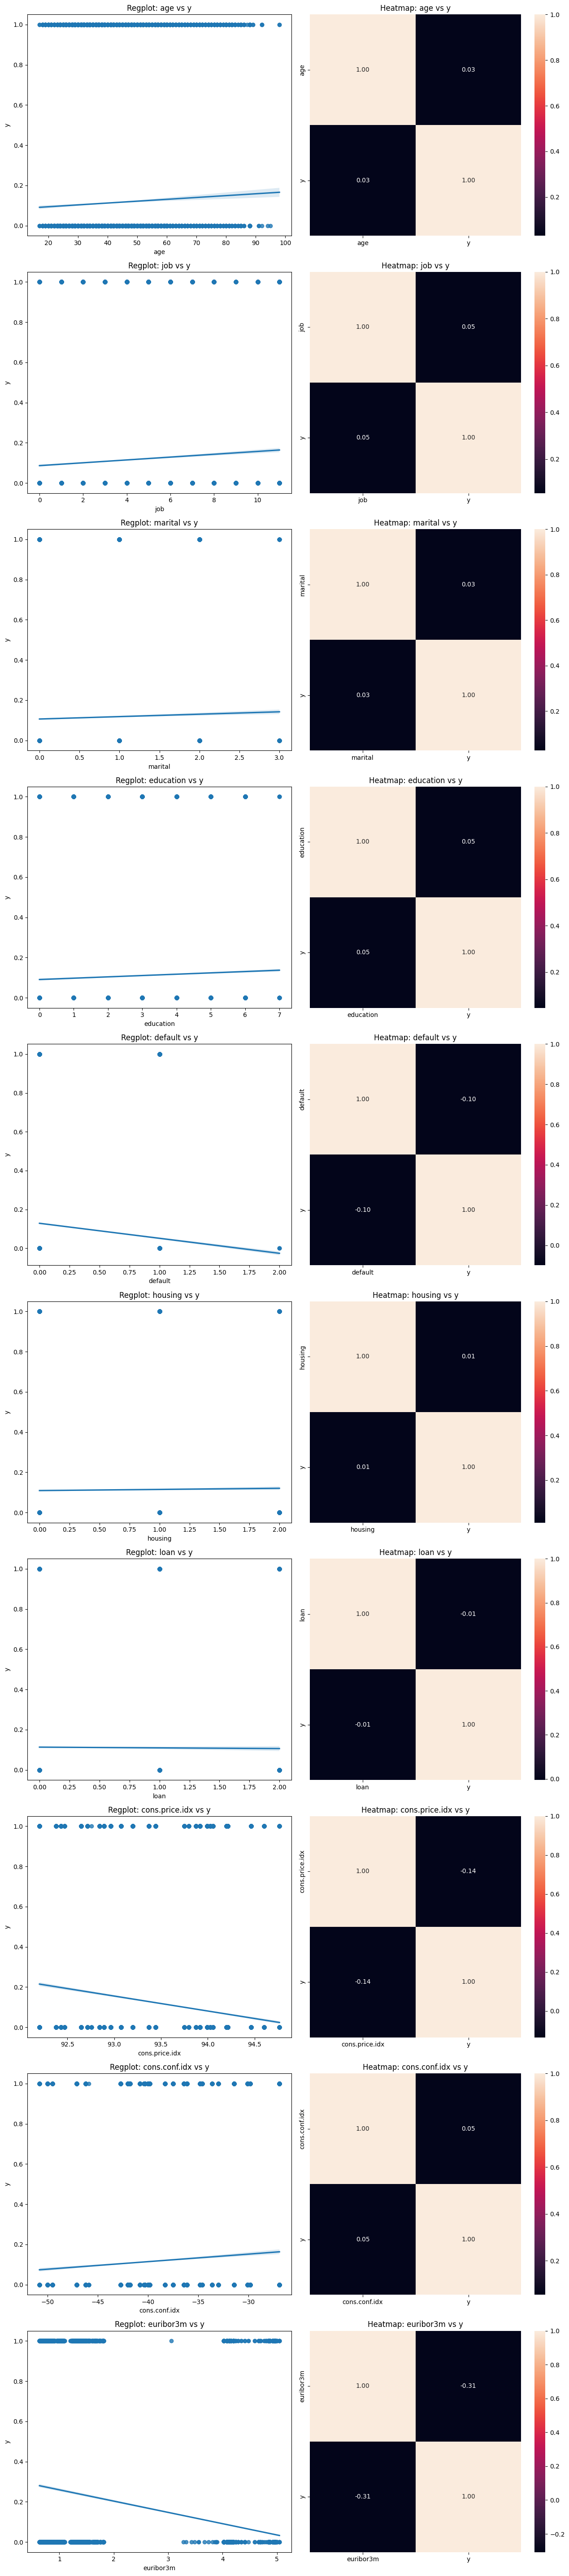

In [5]:
# CUSTOM FUNCTION FOR NUMERICAL-NUMERICAL ANALYSIS
eda.plot_scatter_heatmaps(total_data,target)

### 1.3. General correlation heatmap:

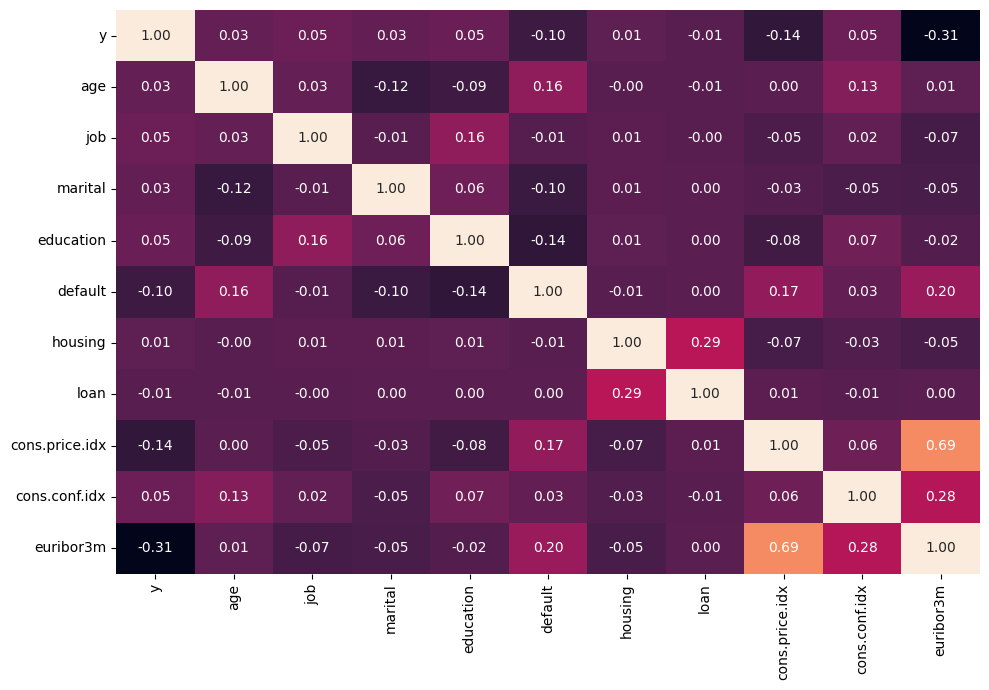

In [6]:
eda.general_heatmap(total_data,target)

The numerical-numerical analysis yields the following conclusions:
there are no strong correlations. However, the stronger correlations are **euribor3m (-0,31)**, **cons.price.idx (-0.14)** and **default (-0,10)**. 

The weakest correlations are **housing and loan (0,01)**, **age and marital (0,03)** and **job, education and cons.conf.idx (0,05)**


### 1.4. General dataset scatter plot:

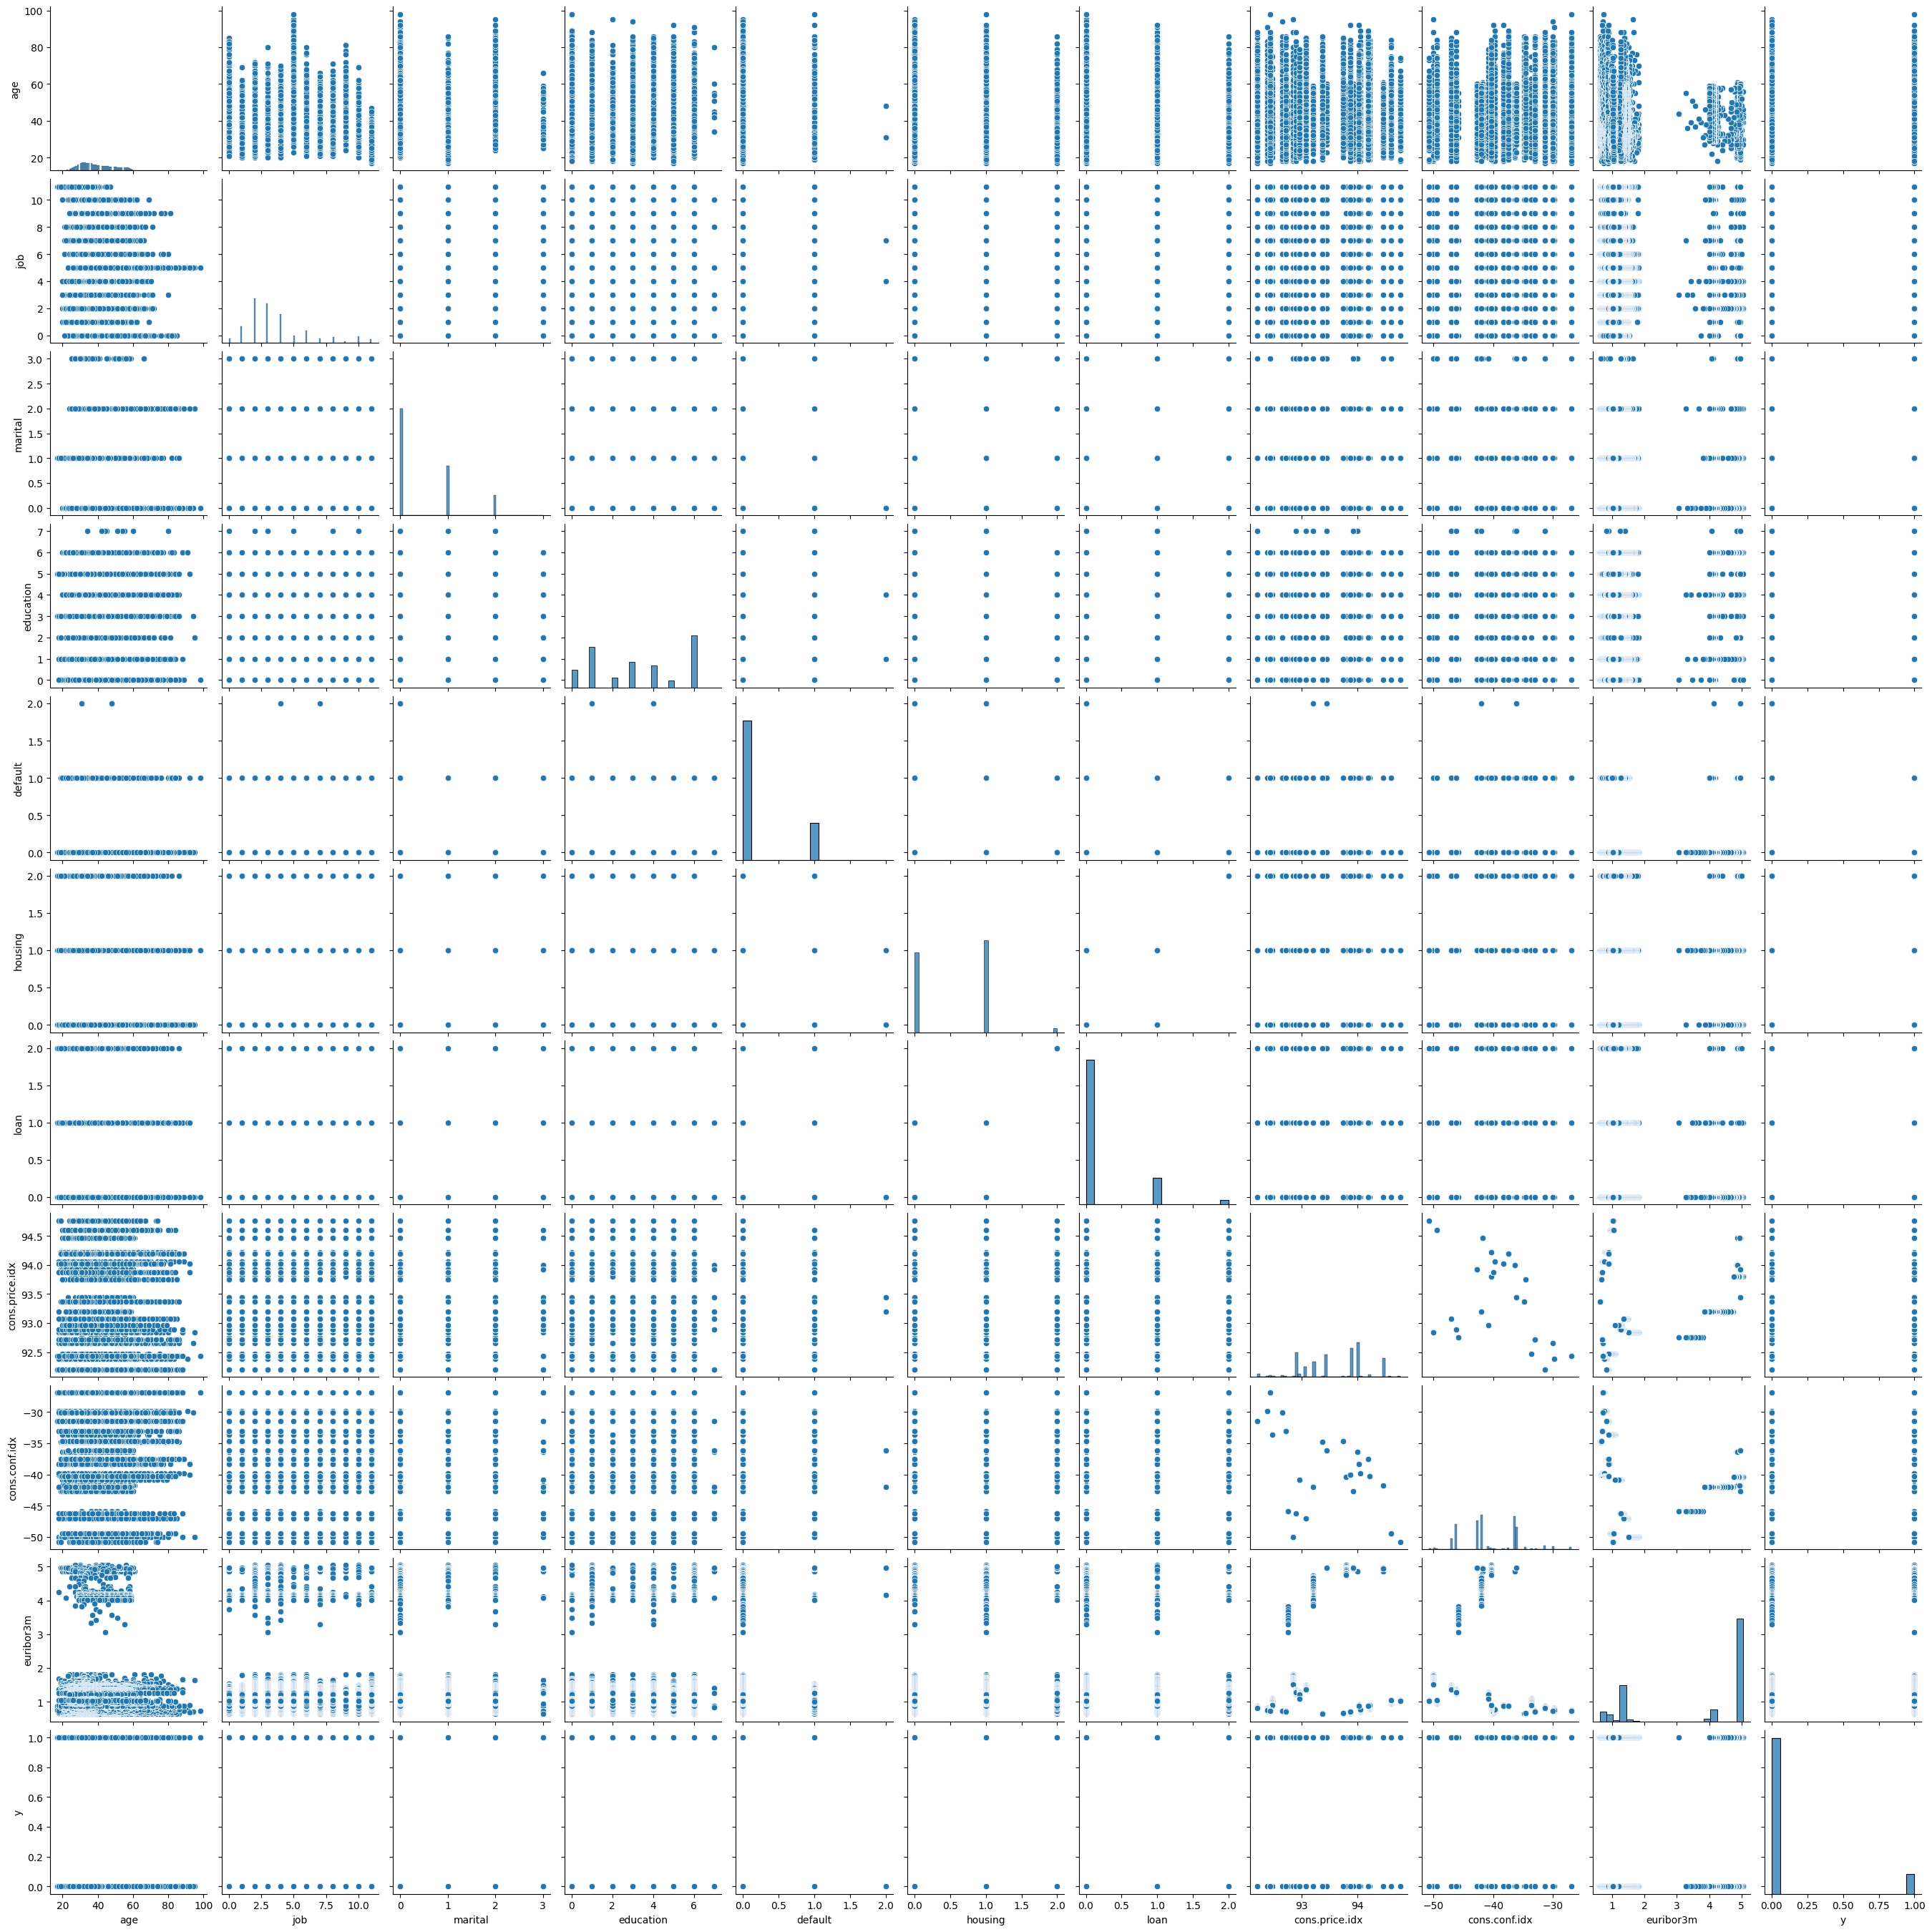

In [7]:
# General pairplot
sns.pairplot(data = total_data)

## STEP 2: FEATURE ENGINEERING

---

### 2.1. Outiler analysis:

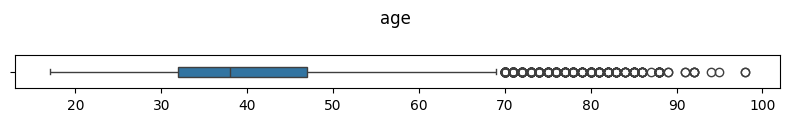

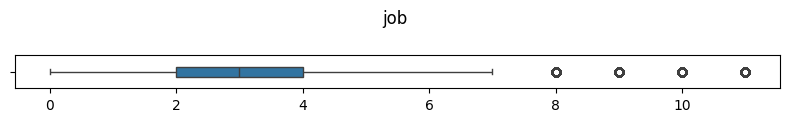

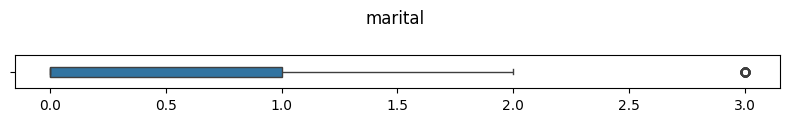

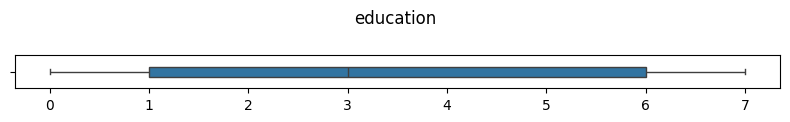

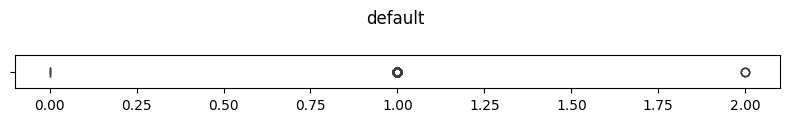

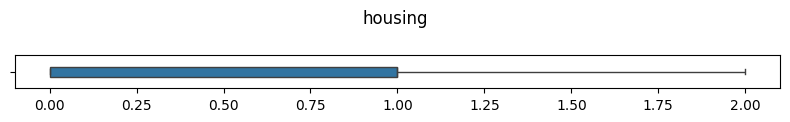

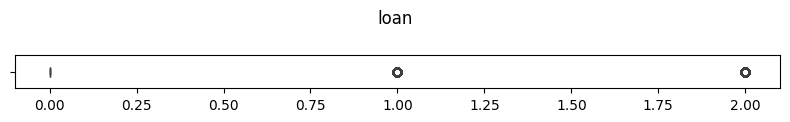

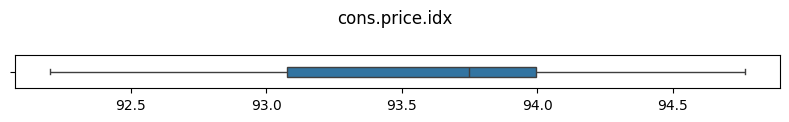

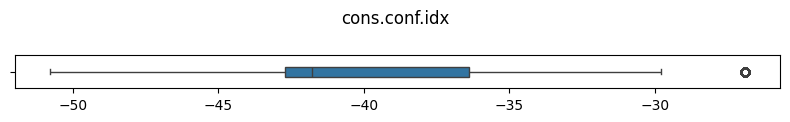

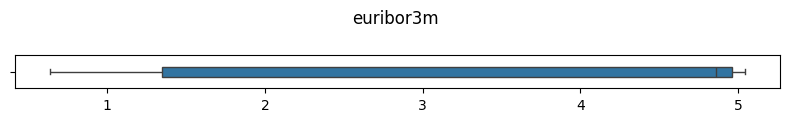

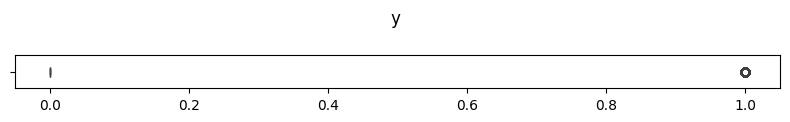

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
job,41176.0,3.673863,2.454340,0.000,2.000,3.000,4.000,11.000
marital,41176.0,0.510637,0.696794,0.000,0.000,0.000,1.000,3.000
education,41176.0,3.277370,2.185558,0.000,1.000,3.000,6.000,7.000
default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.000,2.000
housing,41176.0,0.571959,0.541216,0.000,0.000,1.000,1.000,2.000
loan,41176.0,0.199825,0.456055,0.000,0.000,0.000,0.000,2.000
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


In [8]:
# CUSTOM FUNCTION for standard outlier analysis (graph and description)
eda.outlier_analysis(total_data,'Outcome')

Statistical outliers are present in the columns 'age', 'job', 'marital', 'default', 'loan', 'cons.conf.idx'.

- **'Age' and 'cons.conf.idx'** will be discarderd as outliers due to their logical correlation with the expected outcomes.

- **'job', 'marital', 'default', 'loan'** have unknown values inside them, that can affect the outcome. 

Next, the correlation will be displayed after dropping the unkown values in all the variables and replacing them for the mode.



In [9]:
print("ORIGINAL DATASET", total_data.shape)
total_data[outliers].describe().T

ORIGINAL DATASET (41176, 11)


,count,mean,std,min,25%,50%,75%,max
job,41176.0,3.673863,2.454340,0.0,2.0,3.0,4.0,11.0
marital,41176.0,0.510637,0.696794,0.0,0.0,0.0,1.0,3.0
education,41176.0,3.277370,2.185558,0.0,1.0,3.0,6.0,7.0
default,41176.0,0.208908,0.406713,0.0,0.0,0.0,0.0,2.0
housing,41176.0,0.571959,0.541216,0.0,0.0,1.0,1.0,2.0
loan,41176.0,0.199825,0.456055,0.0,0.0,0.0,0.0,2.0


According to EDA analysis standards, NaN values will be **replaced with the mode of each variable**.

In [10]:
# LOOP FOR REPLACEMENT
for column in outliers:
    nan_total_data[column].fillna(nan_total_data[column].mode()[0], inplace=True)
# LOOP FOR FACTORIZATION
for x in nan_total_data[categoric]:
    nan_total_data[x] = pd.factorize(nan_total_data[x])[0] 
# PRINT NEW DATASET
print("FILTERED DATASET", nan_total_data.shape)
nan_total_data[outliers].describe().T  


FILTERED DATASET (41176, 11)


,count,mean,std,min,25%,50%,75%,max
job,41176.0,3.561152,2.259208,0.0,2.0,3.0,4.0,10.0
marital,41176.0,0.504809,0.688443,0.0,0.0,0.0,1.0,2.0
education,41176.0,2.981518,1.836597,0.0,1.0,3.0,5.0,6.0
default,41176.0,0.000073,0.008535,0.0,0.0,0.0,0.0,1.0
housing,41176.0,0.547916,0.497705,0.0,0.0,1.0,1.0,1.0
loan,41176.0,0.151739,0.358772,0.0,0.0,0.0,0.0,1.0


In [11]:
# CUSTOM FUNCTION FOR CORRELATION COMPARISON BETWEEN DATASETS
def cor_comparison(dataset,dataset2,target):
    corr1 = dataset.corr()[target][:-1]
    corr2 = dataset2.corr()[target][:-1]

    comparison_df = pd.DataFrame({
        'Original': corr1,
        'Filtered': corr2
    })
    return comparison_df

cor_comparison(total_data,nan_total_data,target)

,Original,Filtered
age,0.030381,0.030381
job,0.054829,0.054971
marital,0.026363,0.025683
education,0.045663,0.041770
default,-0.099364,-0.003042
housing,0.009605,0.011145
loan,-0.005051,-0.004478
cons.price.idx,-0.136134,-0.136134
cons.conf.idx,0.054802,0.054802
euribor3m,-0.307740,-0.307740


**Variables with improved correlation:**
1. job: 0.054829 to 0.054971
2. housing: 0.009605 to 0.011145

**Variables with Decreased Correlation:**
1. marital: 0.026363 to 0.025683
2. default: -0.099364 to -0.003042
3. loan: -0.005051 to -0.004478
4. education: 0.045663 to 0.041770


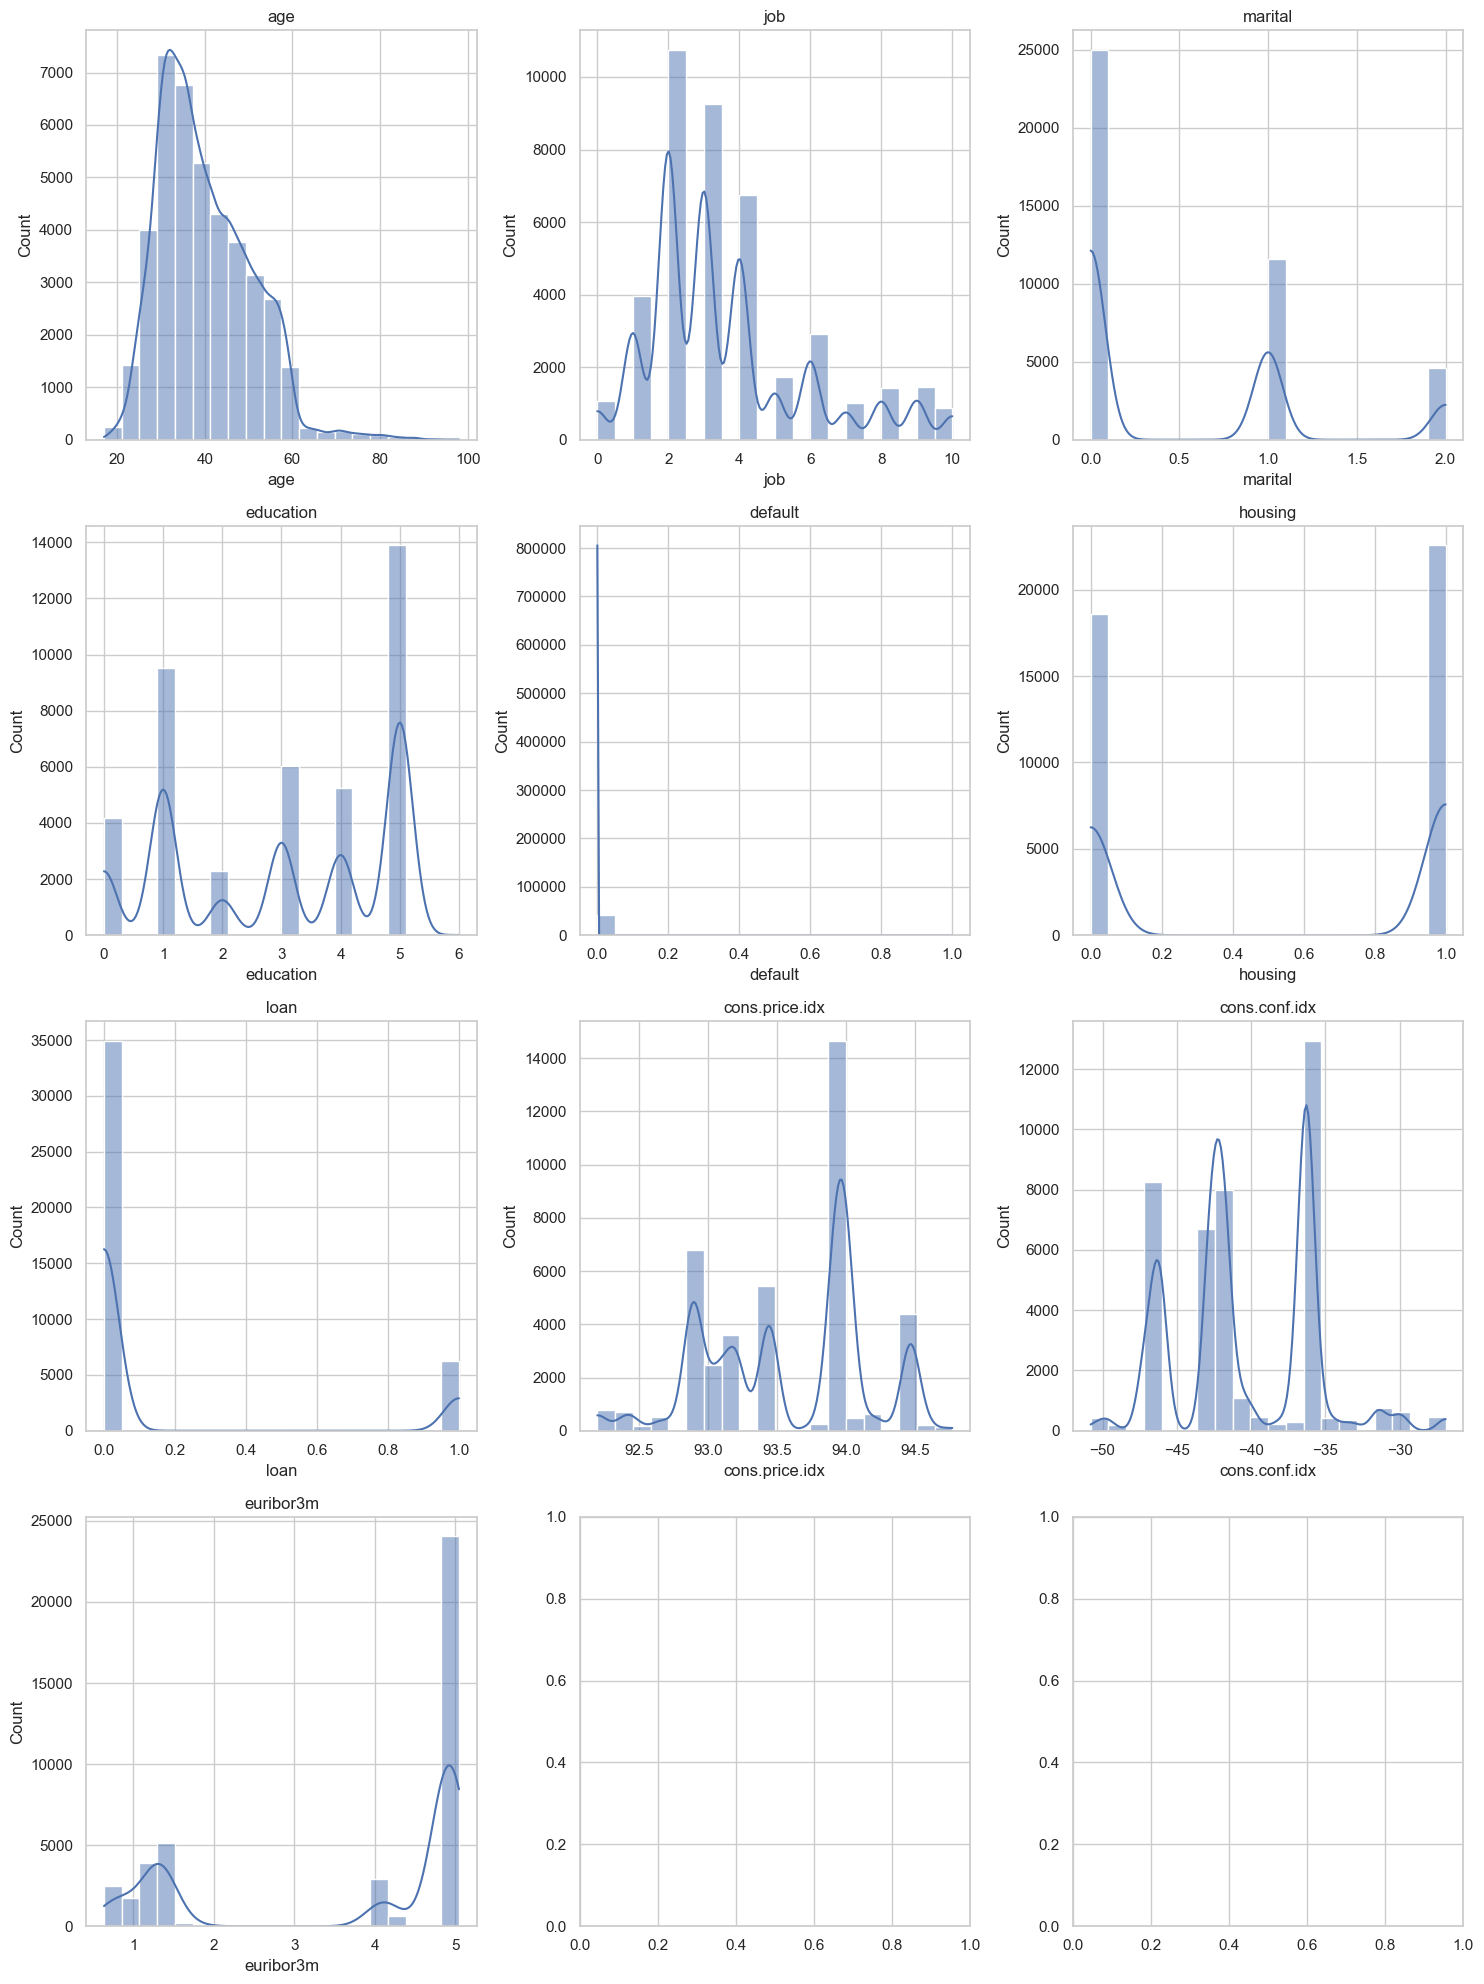

In [12]:
# CUSTOM FUNCTION FOR HISTOGRAMS
eda.small_histogram(nan_total_data,target)

Save the nan data:

In [15]:
nan_total_data.to_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Logistic-Regression-Project-Tutorial-Fouine\data\interim\nan_total_data.csv')

## Step 3: Feature engineering
---
_NOTE: Following the completion of the research, it is determined that there are no viable options for merging variables or generating new features. Consequently, the filtered dataset will be partitioned and preserved in its entirety, retaining all variables within it._


### 3.1. Train / Test division

The nan replaced dataset will be used instead of the original

In [20]:
from sklearn.model_selection import train_test_split

# CREATE A MASK WITH THE USED VARIABLES
variables = []
for x in nan_total_data:  
    if x == target:
        continue
    variables.append(x)

# We divide the dataset into training and test samples
X = total_data.drop(target, axis = 1)[variables]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m
12346,29,10,0,2,0,1,1,93.918,-42.7,4.959
8564,50,2,1,6,0,0,0,94.465,-41.8,4.864
21417,29,2,1,6,0,0,0,93.444,-36.1,4.963
3315,35,2,1,6,0,0,0,93.994,-36.4,4.860
33236,40,3,1,1,1,0,0,92.893,-46.2,1.291


### 3.2. Standard value scalation

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = variables)

X_train_norm.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m
12346,-1.058427,2.600348,-0.734095,-0.582336,-0.511455,0.788248,1.750366,0.589534,-0.470932,0.771196
8564,0.954767,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,1.534740,-0.276368,0.716413
21417,-1.058427,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,-0.229530,0.955866,0.773502
3315,-0.483229,-0.679177,0.698859,1.248416,-0.511455,-1.060840,-0.440002,0.720860,0.891011,0.714107
33236,-0.003897,-0.269237,0.698859,-1.040024,1.953044,-1.060840,-0.440002,-1.181648,-1.227566,-1.343979


### 3.3. Features selection

In [22]:
from sklearn.feature_selection import f_classif, SelectKBest

# WE SELECT THE TOP 5 VARIABLES
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,job,default,cons.price.idx,cons.conf.idx,euribor3m
0,10.0,0.0,93.918,-42.7,4.959
1,2.0,0.0,94.465,-41.8,4.864
2,2.0,0.0,93.444,-36.1,4.963
3,2.0,0.0,93.994,-36.4,4.860
4,3.0,1.0,92.893,-46.2,1.291


In [23]:
X_train_sel[target] = list(y_train)
X_test_sel[target] = list(y_test)

X_train_sel.to_csv("clean_bank_train.csv", index=False)
X_test_sel.to_csv("clean_bank_test.csv", index=False)

## GENERAL CONCLUSIONS OF EDA ANALYSIS
---

With this step, the Exploratory Data Analysis (EDA) is considered complete. Below are concise bullet points summarizing the main conclusions:

**1. General Dataset Conclusions:**

**_Dataset Overview:_**
- The dataset comprises  and 41.188 entries and 21 columns, including the target variable and predictors. there are 21 variables, including the numerical target variable 'y'.

**_Data Characteristics:_**
- There are 10 numeric predictors and 10 categorical predictors, and the target variable 'y' provides a yes / no outcome meaning the likelihood of the clients to ask for a long-term loan.

**_Data Quality:_**
- Six categorical variables -'job','marital','education','default','housing','loan'- exhibit outliers. There were 12 duplicated rows, which have been dropped.

**_Dropped info:_**
- the following columns were dropped:
'contact','month','day_of_week', 'duration', 'pdays', 'previous', 'poutcome','campaign', 'emp.var.rate', 'nr.employed' due to the lack of important information. 

---

**2. Summary of Correlations Between Predictor Variables and the Target Variable (Outcome):**

|            | Original   | Filtered    | Evolution |
|------------|------------|-------------|-----------|
| euribor3m  | -0.307  | -0.307   | Similar   |
| cons.price.idx | -0.136 | -0.136 | Similar   |
| default    | -0.099  | -0.003   | **Negative**  |
| job        | 0.054   | 0.054    | Similar   |
| cons.conf.idx | 0.054 | 0.054    | Similar   |
| education  | 0.045   | 0.041    | **Negative**   |
| age        | 0.030   | 0.030    | Similar   |
| marital    | 0.026   | 0.025    | **Negative**   |
| housing    | 0.009   | 0.011    | **Positive**  |
| loan       | -0.005  | -0.0048   | **Negative**   |

---

**3. Outliers and Variable Analysis:**

- The replacement of the 'unknown' values resulted in a decrease of the correlation between the predictors and the taget variable (except for 'housing' variable).

---

**4. Feature engineering:**

The dataset has no variables merging possibilities. After de standard escalation, the feature selecction returned 'job', 'default', 'cons.price.idx', 'cons.conf.idx' and 'euribor3m' as the main predictors for data analysis.

---

**5. Overall conclusions:**

The dataset does not provide data with strong correlation to perform the machine learning models.
